In [1]:
from record import *
import matplotlib.pyplot as plt
import matplotlib.dates
from scipy import signal
from scipy.signal import find_peaks, peak_prominences, peak_widths
from PIL import Image

from os import listdir
from os.path import isfile, join
mypath='./LSDWA-F/LSDWA-F_29-07-2019_12-13/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

getting header


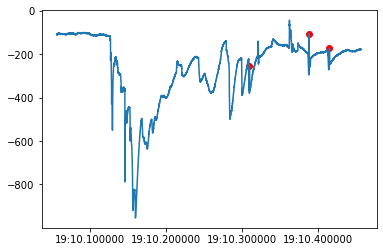

In [2]:
#Plotting file

t=Record(mypath+files[36])
plt.plot(t.date[0:20000],t.chanel1[0:20000])

#peakind = signal.find_peaks_cwt(t.chanel1[0:20000], widths=0.5, min_length=1, noise_perc=1)
peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
if len(peakind)==0:
    peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    
for i in range(len(peakind)):
    plt.scatter(t.date[peakind[i]], t.chanel1[peakind[i]], c='r')
plt.show()


getting header


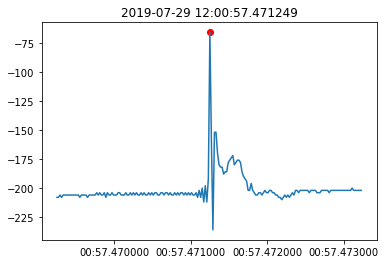

Rise time: [0.02783299]
Height: [-140.]


In [3]:
#Peaks from file

t=Record(mypath+files[0])
peakind, properties = find_peaks(t.chanel1[0:20000], threshold=30, distance=400)
if len(peakind)==0:
    peakind, properties = find_peaks(-t.chanel1[0:20000], threshold=30, distance=400)
    
if len(peakind)>=1:
    for i in range(len(peakind)):
        ind=np.arange(peakind[i]-100,peakind[i]+100,1)    
        time=matplotlib.dates.date2num(t.date[peakind[i]-100:peakind[i]+100])
        plt.plot(time,t.chanel1[ind])
        plt.scatter(t.date[peakind[i]],t.chanel1[peakind[i]], c='r')
        plt.title(str(t.date[peakind[i]]))
        plt.show()
else:
    print('Trigger not found')
    
print('Rise time: '+str(0.02*peak_widths(t.chanel1[0:20000], peakind)[0])) #czas narastania w mikrosekundach
print('Height: '+str(peak_widths(t.chanel1[0:20000], peakind)[1])) #wysokości


getting header


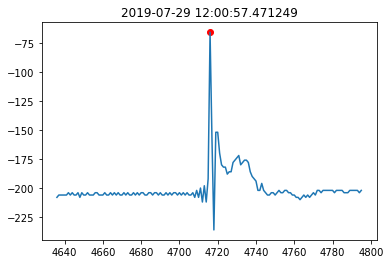

getting header


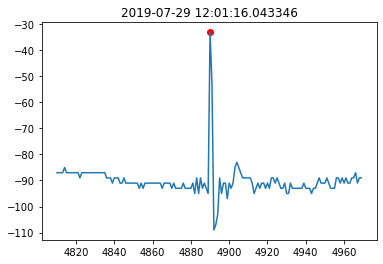

getting header


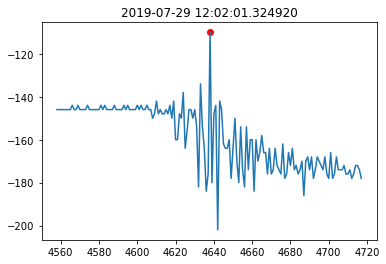

getting header


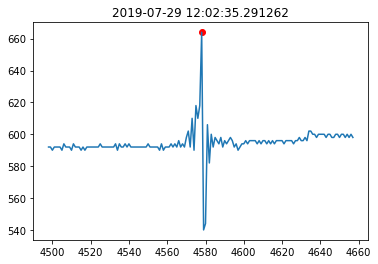

getting header


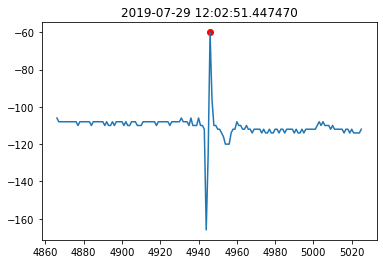

getting header


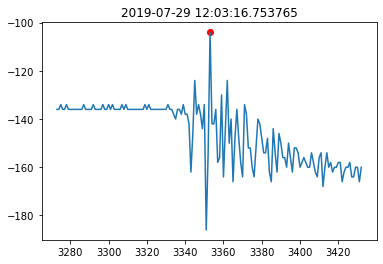

getting header


In [ ]:
#Saving data

dates=[]
im=[]
trise=[]

for i in range(len(files)):
    t=Record(mypath+files[i])
    peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
    if len(peakind)==0:
        peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    if len(peakind)>=1:        
        dates.append((str(t.date[peakind[0]].hour)+':'+str(t.date[peakind[0]].minute)+':'+str(t.date[peakind[0]].second)+'.'+str(t.date[peakind[0]].microsecond)))
        
        ind=np.arange(peakind[0]-80,peakind[0]+80,1) 
        #time=t.date[peakind[0]-80:peakind[0]+80]
        #plt.plot(time,t.chanel1[ind])
        #plt.scatter(t.date[peakind[0]],t.chanel1[peakind[0]], c='r')
        plt.plot(ind,t.chanel1[ind])
        plt.scatter(peakind[0],t.chanel1[peakind[0]], c='r')
        plt.title(str(t.date[peakind[0]]))
        plt.savefig('./images/'+str(i+1)+'.png')
        plt.show()
        im.append(Image.open('./images/'+str(i+1)+'.png'))
        
        trise.append(round(0.02*peak_widths(t.chanel1[0:20000], peakind)[0][0],2))
        
    else:
        dates.append(0)
        im.append(0)
        trise.append(0)
        

#### 

In [ ]:
d = {'id': np.arange(1,142,1),
    'file': files,
    'time': dates,
    'images': im,   
    't_rise': trise
             }